In [1]:
## TODO
"""
1. Implement goal kick problem (due Wednesday)
2. Include additional z-accelerations based on actual objects (goal is 10 total) [due Friday]
3. Add colorbar label of destroyed and survived (instead of 1, 2) [due Friday]
4. Add a second heatmap with colors related to the final velocity (instead of survived/destroyed) [due Monday]
5. Play with colormaps [due Monday]
""" 

'\n1. Implement goal kick problem (due Wednesday)\n2. Include additional z-accelerations based on actual objects (goal is 10 total) [due Friday]\n3. Add colorbar label of destroyed and survived (instead of 1, 2) [due Friday]\n4. Add a second heatmap with colors related to the final velocity (instead of survived/destroyed) [due Monday]\n5. Play with colormaps [due Monday]\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

/home/ryanjsfx/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
NewtonG = 6.67e-11 # m^3 kg^-1 s^-2 [N m^2 kg^-2]
gravEarth = 9.8 # m/s^2 gravitational acceleration close to Earth's surface

In [4]:
class GravitySolver:
    def __init__(self, dt, problem_type, NT, posxI, posyI, poszI, velxI, velyI, velzI, accxI, accyI, acczI):
        self.problem_type = problem_type
        self.dt = dt
        self.NT = NT

        if problem_type == "SurfaceProblem" and acczI > 0:
            raise ValueError("z acceleration must be negative!")
        
        self.init_arrays()
        self.set_initial_conditions(posxI, posyI, poszI, velxI, velyI, velzI, accxI, accyI, acczI)

        self.simulate()
        self.clean_data()
        self.save_results()
        #self.plot_simulation(self.posz, self.velz, self.accz)
        
    def init_arrays(self):
        #self.data = np.zeros((?, NT))
        self.time = np.zeros(self.NT)
        self.posx = np.zeros(self.NT)
        self.posy = np.zeros(self.NT)
        self.posz = np.zeros(self.NT)

        self.velx = np.zeros(self.NT)
        self.vely = np.zeros(self.NT)
        self.velz = np.zeros(self.NT)

        self.accx = np.zeros(self.NT)
        self.accy = np.zeros(self.NT)
        self.accz = np.zeros(self.NT)

    def set_initial_conditions(self, posxI, posyI, poszI, velxI, velyI, velzI, accxI, accyI, acczI):
        self.posx[0] = posxI
        self.posy[0] = posyI
        self.posz[0] = poszI

        self.velx[0] = velxI
        self.vely[0] = velyI
        self.velz[0] = velzI

        self.accx[0] = accxI
        self.accy[0] = accyI
        self.accz[0] = acczI

    def update_time(self, index):
        return self.time[index-1] + self.dt
    
    def update_posx(self):
        pass

    def update_posy(self):
        pass

    def update_posz_theoretical(self, index):
        if problem_type == "SurfaceProblem":
            return self.posz[0] + self.velz[0]*self.time[index] + \
                   0.5 * self.accz[index-1] * self.time[index]**2

    def update_posz(self, index):        
        return self.posz[index-1] + self.velz[index-1]*(self.dt) + \
               0.5 * self.accz[index-1] * (self.dt)**2
        
    def update_velx(self):
        pass

    def update_vely(self):
        pass

    def update_velz_theoretical(self, index):
        if problem_type == "SurfaceProblem":
            return self.velz[0] + self.accz[index-1] * self.time[index]

    def update_velz(self, index):
        return self.velz[index-1] + self.accz[index-1] * (self.dt)
        
    def update_accx(self):
        pass

    def update_accy(self):
        pass

    def update_accz(self):
        if problem_type == "SurfaceProblem":
            return self.accz[0]
            
    def simulate(self):
        for index in range(1,self.NT):
            self.time[index] = self.update_time(index)
            self.posx[index] = self.update_posx()
            self.posy[index] = self.update_posy()
            self.posz[index] = self.update_posz(index)

            self.velx[index] = self.update_velx()
            self.vely[index] = self.update_vely()
            self.velz[index] = self.update_velz(index)

            self.accx[index] = self.update_accx()
            self.accy[index] = self.update_accy()
            self.accz[index] = self.update_accz()
            
            if self.problem_type == "SurfaceProblem" and self.posz[index] <= 0:
                break

        if self.posz[-1] > 0:
            raise ValueError("Object did not hit the ground!")
        

    def clean_data(self):
        indices = np.where(self.time > 0)[0]

        self.time = np.append(self.time[0], self.time[indices])
        
        self.posx = np.append(self.posx[0], self.posx[indices])
        self.posy = np.append(self.posy[0], self.posy[indices])
        self.posz = np.append(self.posz[0], self.posz[indices])

        self.velx = np.append(self.velx[0], self.velx[indices])
        self.vely = np.append(self.vely[0], self.vely[indices])
        self.velz = np.append(self.velz[0], self.velz[indices])

        self.accx = np.append(self.accx[0], self.accx[indices])
        self.accy = np.append(self.accy[0], self.accy[indices])
        self.accz = np.append(self.accz[0], self.accz[indices])

    def save_results(self):
        data = [self.time, self.posx, self.posy, self.posz, self.velx, self.vely, self.velz,
                self.accx, self.accy, self.accz]
        filename = "posz0_" + str(self.posz[0]) + "_accz0_" + str(self.accz[0]) + \
                    "_dt_" + str(self.time[1] - self.time[0]) + "_NT_" + str(self.dt) + ".npz"
            
        np.savez_compressed(filename, data)
        
    def plot_simulation(self, posz, velz, accz):
        fig,axs = plt.subplots(3)

        yvalues = [posz, velz, accz]
        ylabels = ["z-position [m]", "z-velocity [m/s]", r"z-acceleration [m/s$^2$]"]
        for index in range(len(yvalues)):
            axs[index].plot(self.time, yvalues[index])
            axs[index].set_ylabel(ylabels[index])

        axs[0].set_xlabel("time [s]")
        plt.show()
        self.the_plot = plt.gca()

In [5]:
dt = 0.1
problem_type = "SurfaceProblem"
NT = 100
posxI = 0
posyI = 0
poszI = 15 # meters
velxI = 0
velyI = 0
velzI = 0
accxI = 0
accyI = 0
acczI = -9.8

In [6]:
gravitySolverObject = GravitySolver(dt, problem_type, NT, posxI, posyI, poszI, velxI, velyI, velzI, accxI, accyI, acczI)
#gravitySolverObject.the_plot.savefig("dropped_ball_v2.png")
#gravitySolverObject.the_plot.close()

In [7]:
## convergence study
tsim = NT*dt
dts = np.logspace(np.log10(1e-3), np.log10(3), 10) #[1e-3, 1e-2, 0.1, 10]
NTs = tsim/dts

print("dts: ", dts)
print("NTs: ", NTs)

gravitySolverObjects = []
for i in range(len(dts)):
    gravitySolverObject = GravitySolver(dts[i], problem_type, int(NTs[i]), posxI, posyI, poszI, velxI, velyI, velzI, accxI, accyI, acczI)
    gravitySolverObjects.append(gravitySolverObject)

dts:  [1.00000000e-03 2.43414702e-03 5.92507173e-03 1.44224957e-02
 3.51064750e-02 8.54543215e-02 2.08008382e-01 5.06322984e-01
 1.23246459e+00 3.00000000e+00]
NTs:  [1.00000000e+04 4.10821528e+03 1.68774328e+03 6.93361274e+02
 2.84847738e+02 1.17021583e+02 4.80749857e+01 1.97502391e+01
 8.11382341e+00 3.33333333e+00]


In [8]:
## L1-norm (absolute error)
L1norms = []
L2norms = []

highResPosz = gravitySolverObjects[0].posz
highResTime = gravitySolverObjects[0].time
for gravitySolverObject in gravitySolverObjects:
    L1norms.append([])
    L2norms.append([])
    
    for ii,time in enumerate(gravitySolverObject.time):
        if gravitySolverObject.posz[ii] < 0:
            continue

        index = np.argmin(np.abs(highResTime - time))
        
        L1norm = np.abs( gravitySolverObject.posz[ii] - highResPosz[index] )
        L2norm = L1norm / highResPosz[index]

        L1norms[-1].append(L1norm)
        L2norms[-1].append(L2norm)
    
#print(L2norms)

ValueError: x and y must have same first dimension, but have shapes (10,) and (9,)

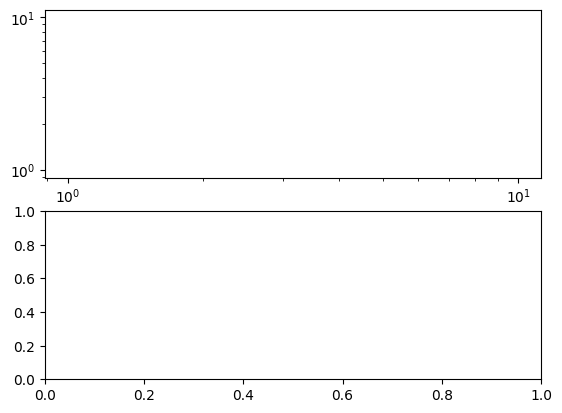

In [9]:
L1norm_maxs = []
L2norm_meds = []
for ii in range(len(L1norms)):
    L1norm = L1norms[ii]
    L2norm = L2norms[ii]
    L1norm = np.array(L1norm)
    L1norm_maxs.append(np.max(L1norm))
    L2norm = np.array(L2norm)
    L2norm_meds.append(np.median(L2norm))

#NTs = NTs[1:]
L1norm_maxs = L1norm_maxs[1:]
L2norm_meds = L2norm_meds[1:]
fig,axs = plt.subplots(2)
axs[0].loglog(NTs, L1norm_maxs)
axs[1].loglog(NTs, L2norm_meds)
axs[1].set_xlabel("Number of Time Steps")
axs[0].set_ylabel("max L1 norm")
axs[1].set_ylabel("median L2 norm")

In [10]:
class GravitySolver:
    def __init__(self, dt, problem_type, NT, dataI):
        self.problem_type = problem_type
        self.dt = dt
        self.NT = NT
        
        if problem_type == "SurfaceProblem" and dataI[-1] > 0:
            raise ValueError("z acceleration must be negative!")
        
        self.init_constants()
        self.init_arrays()
        self.set_initial_conditions(dataI)

        self.simulate()
        self.clean_data()
        self.save_results()
        #self.plot_simulation(self.data[3, :], self.data[6, :], self.data[9, :])

    def init_constants(self):
        self.NewtonG = 6.67e-11 # m^3 kg^-1 s^-2 [N m^2 kg^-2]
        self.gravEarth = 9.8 # m/s^2 gravitational acceleration close to Earth's surface
        
    def init_arrays(self):
        #self.data = np.zeros((?, NT))
        #time = 0, posx = 1, posy = 2, posz = 3, velx = 4, vely = 5, velz = 6, accx = 7, accy = 8, accz = 9
        self.data = np.zeros((10, NT))
        

    def set_initial_conditions(self, dataI):
        self.data[1:, 0] = dataI

    def update_time(self):
        return self.data[0, self.index-1] + self.dt
    
    def update_posx(self):
        pass

    def update_posy(self):
        pass

    def update_posz_theoretical(self):
        if problem_type == "SurfaceProblem":
            return self.data[3, 0] + self.data[6, 0]*self.data[0, self.index] + \
                   0.5 * self.data[10, 0] * self.data[0, self.index]**2

    def update_posz(self):
        return self.data[3, self.index-1] + self.data[6, self.index-1]*(dt) + \
               0.5 * self.data[9, self.index-1] * (dt)**2
        
    def update_velx(self):
        pass

    def update_vely(self):
        pass

    def update_velz_theoretical(self):
        if problem_type == "SurfaceProblem":
            return self.data[6, 0] + self.data[9, self.index-1] * self.data[0, self.index]

    def update_velz(self):
        return self.data[6, self.index-1] + self.data[9, self.index-1] * (dt)
        
    def update_accx(self):
        pass
    
    def update_accy(self):
        pass

    def update_accz(self):
        if problem_type == "SurfaceProblem":
            return self.data[9, 0]
            
    def simulate(self):
        for index in range(1,self.NT):
            self.index = index
            list_of_data = [self.update_time, self.update_posx, self.update_posy, self.update_posz, self.update_velx,
                           self.update_vely, self.update_velz, self.update_accx, self.update_accy, self.update_accz]
           
            for jj, function in enumerate(list_of_data):
                self.data[jj, self.index] = function()
            
            if self.problem_type == "SurfaceProblem" and self.data[3, self.index] <= 0:
                break
                
        if self.data[3,-1] > 0:
            raise ValueError("Object did not hit the ground!")


    def clean_data(self):
        cleandata = []
        indices = np.where(self.data[0, :] > 0)[0]

        for i in range (self.data.shape[0]):
            cleandata.append(np.append(self.data[i, 0], self.data[i, indices]))
            
        self.data = cleandata
        self.data = np.array(self.data)
      

    def save_results(self):
        filename = "posz0_" + str(self.data[3, 0]) + "_accz0_" + str(self.data[9, 0]) + \
                    "_dt_" + str(self.data[0, 1] - self.data[0, 0]) + "_NT_" + str(self.dt) + ".npz"
            
        np.savez_compressed(filename, self.data)
        
    def plot_simulation(self, posz, velz, accz):
        fig,axs = plt.subplots(3)

        yvalues = [posz, velz, accz]
        ylabels = ["z-position [m]", "z-velocity [m/s]", r"z-acceleration [m/s$^2$]"]
        for self.index in range(len(yvalues)):
            axs[self.index].plot(self.data[0, :], yvalues[self.index])
            axs[self.index].set_ylabel(ylabels[self.index])

        # axs[0].plot(times, posz)
        # axs[1].plot(times, velz)
        # axs[2].plot(times, accz)

        axs[0].set_xlabel("time [s]")
        plt.show()
        self.the_plot = plt.gca()

In [14]:
## GOAL: assess survivability of robotic spacecraft making a landing on the surface of a world.
# if velocity exceeds 100 m/s

## CONSTANTS
dt = 0.1
problem_type = "SurfaceProblem"
NT = 10000
posxI = 0
posyI = 0
velxI = 0
velyI = 0
velzI = 0
accxI = 0
accyI = 0

poszIs = np.logspace(np.log10(1), np.log10(10000), 5)

#Fg = G * M * m / r^2
#ag = Fg/m = G * M / r^2
R_Trappist1c = 7e6 # [meters] radius
M_Trappist1c = 8.237e24 # [kg] mass
a_Trappist1c = -NewtonG * M_Trappist1c / R_Trappist1c**2
print(a_Trappist1c)

#         earth, moon,   mars, Io,    Trappist1c
acczIs = [-9.8, -1.625, -3.71, -1.81, a_Trappist1c]

dataI = [posxI, posyI, poszIs[0], velxI, velyI, velzI, accxI, accyI, acczIs[0]]

gravitySolverObjects = []
for acczI in acczIs:
    dataI[-1] = acczI
    for poszI in poszIs:
        dataI[2] = poszI
        gravitySolverObject = GravitySolver(dt, problem_type, NT, dataI)
        gravitySolverObjects.append(gravitySolverObject)
        
## plot heatmap of survived = green, destroyed = red
did_robot_survive = []
velz_survival_threshold = -100 # m/s
for gravitySolverObject in gravitySolverObjects:
    if np.abs(gravitySolverObject.data[6,-1]) >= np.abs(velz_survival_threshold):
        did_robot_survive.append(1)
        print("destroyed!")
    else:
        did_robot_survive.append(2)
        print("survived!")
        
did_robot_survive = np.array(did_robot_survive)
did_robot_survive = did_robot_survive.reshape((len(poszIs), len(acczIs)))

-11.21240612244898
survived!
survived!
survived!
destroyed!
destroyed!
survived!
survived!
survived!
survived!
destroyed!
survived!
survived!
survived!
survived!
destroyed!
survived!
survived!
survived!
survived!
destroyed!
survived!
survived!
survived!
destroyed!
destroyed!


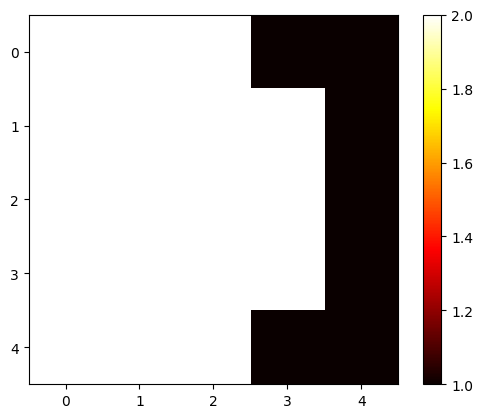

In [12]:
## heatmap v1
plt.imshow(did_robot_survive, cmap='hot')
plt.colorbar()
plt.show()

/tmp/ipykernel_221074/1561911479.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(poszIs2D, acczIs2D, did_robot_survive)


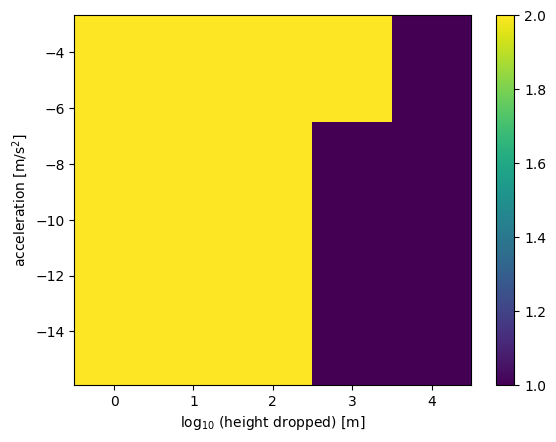

In [15]:
poszIs2D,acczIs2D = np.meshgrid(poszIs, acczIs)
poszIs2D = np.log10(poszIs2D)
plt.pcolormesh(poszIs2D, acczIs2D, did_robot_survive)
plt.xlabel(r"log$_{10}$ (height dropped) [m]")
plt.ylabel(r"acceleration [m/s$^2$]")
cbar = plt.colorbar()

In [ ]:
poszIs2D,acczIs2D = np.meshgrid(poszIs, acczIs)
plt.pcolormesh(poszIs2D, acczIs2D, did_robot_survive)
plt.xlabel("height dropped [m]")
plt.ylabel(r"acceleration [m/s$^2$]")
plt.xscale("log")
cbar = plt.colorbar()

In [ ]:
print(poszIs)
print(acczIs)

In [ ]:
print(np.log10(poszIs))

In [ ]:
print(np.log10(acczIs))

In [ ]:
print(poszIs2D)

In [ ]:
print(np.log10(poszIs2D))

In [ ]:
print(acczIs2D)

In [ ]:
print(did_robot_survive)

In [ ]:
heatmap = np.asarray([[20, 0, 40],
                      [0, 40, 40],
                      [20, 40, 50]])

heatmap_plot = plt.pcolor(heatmap, cmap='RdBu', vmin=0, vmax=100)
plt.colorbar()
plt.show()